In [58]:
# Libraries
import pandas as pd
import seaborn as sns


In [39]:
!git checkout -b "nelson"

Switched to a new branch 'nelson'


In [86]:
# Git
!git branch
!git coa "starting exploration | view vs purchase" && git poh

  main
* nelson
[nelson 3c1e2e1] starting exploration | view vs purchase
 2 files changed, 1052 insertions(+), 48 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 12 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 62.39 KiB | 6.24 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Hmmsien/ECommerce_behavior.git
   655be1a..3c1e2e1  HEAD -> nelson


## Visualization first million rows


In [5]:
df = pd.read_csv('data/2019-Nov.csv',nrows = 1000000)

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [7]:
df.shape

(1000000, 9)

In [8]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    316977
brand            147197
price                 0
user_id               0
user_session          0
dtype: int64

In [9]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(622161, 9)

# Looking at Groups (Categorizable)

In [10]:
event_group = df.groupby("event_type")
event_group.size()

event_type
cart         12736
purchase     12867
view        596558
dtype: int64

### User Behaviours

- Highest views
- view people with highest views 
- View people with highest purchases
- Correlation views and purchases


In [11]:
user_group = df.groupby("user_id")
user_group.size()

user_id
274969076    3
275256741    1
295643776    8
296465302    2
321019934    1
            ..
566505596    1
566505617    2
566505649    1
566505735    1
566505856    1
Length: 121662, dtype: int64

<AxesSubplot:title={'center':'Users with most activity'}, ylabel='user_id'>

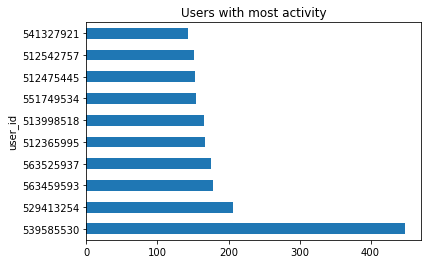

In [15]:
usercount = user_group["user_id"].count().sort_values(ascending=False)
usercount[:10].plot(kind="barh", title="Users with most activity")

<AxesSubplot:title={'center':'Users with highest spenditure'}, ylabel='user_id'>

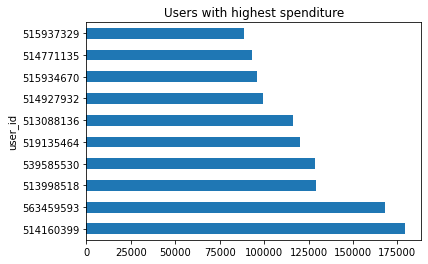

In [17]:
userspend = user_group["price"].sum().sort_values(ascending=False)
userspend[:10].plot(kind="barh", title="Users with highest spenditure")

<AxesSubplot:title={'center':'Users that viewed the most'}, ylabel='user_id'>

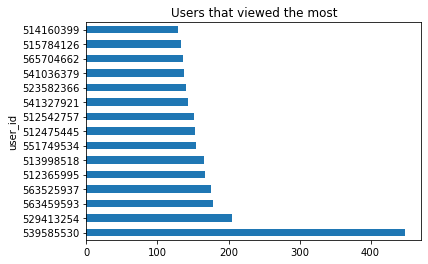

In [42]:
user_group_purchase = df[df["event_type"]=="view"].groupby("user_id")
userActView = user_group_purchase["user_id"].count().sort_values(ascending=False)
userActView[:15].plot(kind="barh", title="Users that viewed the most")

<AxesSubplot:title={'center':'Users that bought the most'}, ylabel='user_id'>

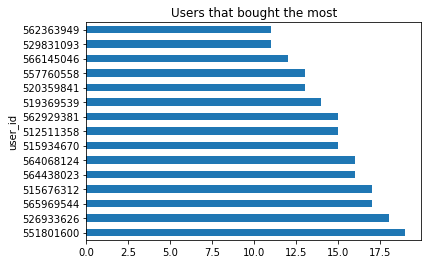

In [43]:
user_group_purchase = df[df["event_type"]=="purchase"].groupby("user_id")
userActPurchase = user_group_purchase["user_id"].count().sort_values(ascending=False)
userActPurchase[:15].plot(kind="barh", title="Users that bought the most")

In [44]:
type(userActPurchase)

pandas.core.series.Series

In [53]:
user_activity = pd.merge(userActPurchase, userActView, right_index=True, left_index= True)
user_activity.columns=["count_view", "count_purchase"]
user_activity.head()

,count_view,count_purchase
user_id,,
551801600,19,50
526933626,18,27
565969544,17,28
515676312,17,35
564438023,16,51


<AxesSubplot:xlabel='count_view', ylabel='count_purchase'>

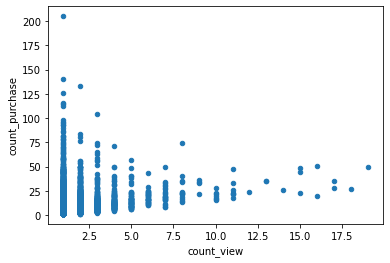

In [54]:
user_activity.plot.scatter(x="count_view", y="count_purchase")

### Looking at Correlations

In [57]:
df.corr()

,product_id,category_id,price,user_id
product_id,1.000000,0.356365,-0.264445,-0.035274
category_id,0.356365,1.000000,-0.056850,-0.003642
price,-0.264445,-0.056850,1.000000,-0.028432
user_id,-0.035274,-0.003642,-0.028432,1.000000


<AxesSubplot:>

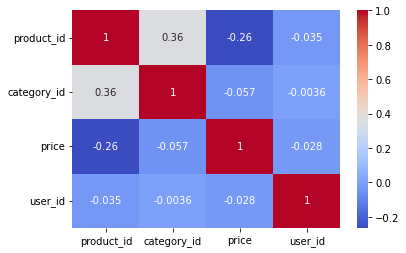

In [62]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [63]:
user_activity.corr()

,count_view,count_purchase
count_view,1.000000,0.259689
count_purchase,0.259689,1.000000


### What people view, vs what people buy

- What brands are viewed the most
- What brands are bought the most


- What brands are viewed the most by Category
- What brands are bought the most by Category



<AxesSubplot:ylabel='brand'>

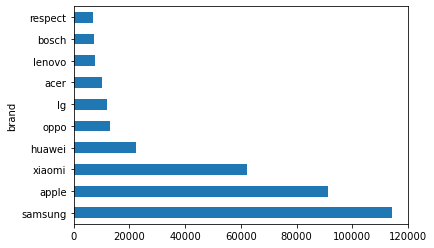

In [71]:

cond = df["event_type"] == "view"
brand_gb_view = df[cond].groupby("brand")
count_brand_view = brand_gb_view["brand"].count().sort_values(ascending=False)

count_brand_view[:10].plot(kind="barh")

<AxesSubplot:ylabel='brand'>

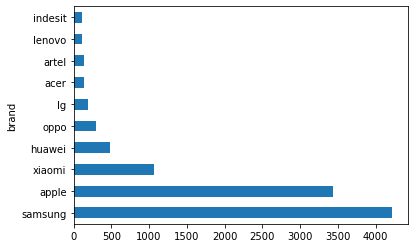

In [70]:

cond = df["event_type"] == "purchase"
brand_gb_purchase = df[cond].groupby("brand")
count_brand_purchase = brand_gb_purchase["brand"].count().sort_values(ascending=False)

count_brand_purchase[:10].plot(kind="barh")

<AxesSubplot:ylabel='brand'>

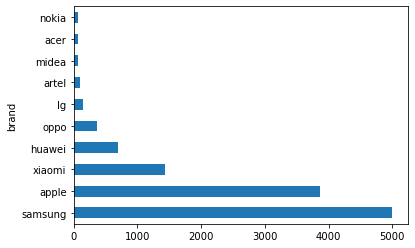

In [69]:

cond = df["event_type"] == "cart"
brand_gb_cart = df[cond].groupby("brand")
count_brand_cart = brand_gb_cart["brand"].count().sort_values(ascending=False)

count_brand_cart[:10].plot(kind="barh")

In [78]:
brand_stats = pd.merge(count_brand_cart, count_brand_view, right_index=True, left_index= True)
brand_stats.columns=["cart", "view"]
# brand_stats.head()
type(brand_stats)

pandas.core.frame.DataFrame

In [82]:
brand_stats = brand_stats.assign(purchase=count_brand_purchase)
brand_stats.head()

,cart,view,purchase
brand,,,
samsung,5001,114400,4222.0
apple,3862,91209,3439.0
xiaomi,1427,62232,1062.0
huawei,691,22395,484.0
oppo,366,13163,296.0


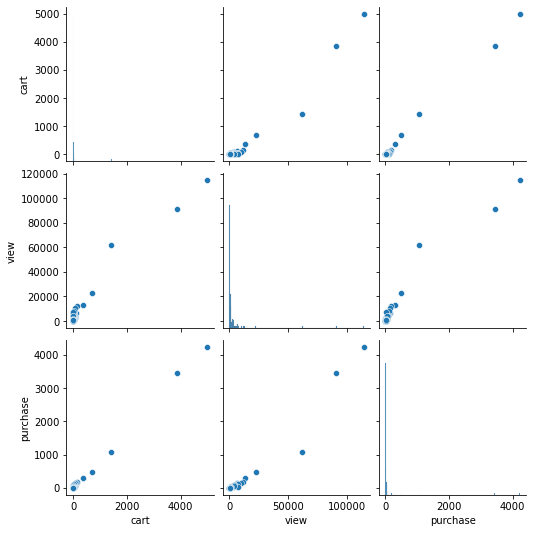

In [84]:
sns.pairplot(brand_stats)

<AxesSubplot:>

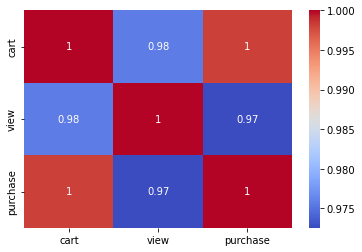

In [85]:
sns.heatmap(brand_stats.corr(), annot=True, cmap="coolwarm")

### Visualization in sales 



- Most expensive categories
- Most sold categories
- Most expensive brands
- Most sold brands
- correlation expensive and sold
- most view brands



In [19]:
product_gb = df.groupby("product_id")
product_gb.size()

product_id
1000978      11
1001588      47
1002098     151
1002099      97
1002100     148
           ... 
60500002     27
60500003      1
60500004      2
60500006      4
60500010      1
Length: 26921, dtype: int64

In [ ]:
product_gb.